<a href="https://colab.research.google.com/github/Singhrahul2511/Deep_Learning_All_exp/blob/main/DL_(ex_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

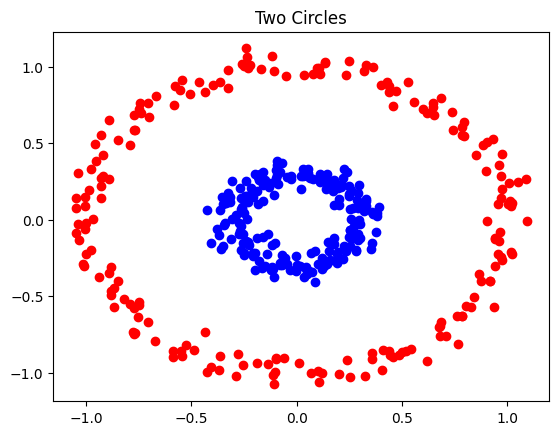

[[ 0.29417304  0.1051093  -1.84770482 -0.1310744  -0.7388925  -0.94883802
   0.08855041  0.4607973  -2.34936741  1.21783243  0.8922374  -1.04396254
   0.24046737  2.06257959 -0.19938578 -1.23911844 -1.63109294 -0.38726168
  -0.64798878 -0.36524028 -1.20572911 -0.17296444  0.27477315  0.20026855
   0.56677537  0.0824303   0.49895913 -0.02393953 -1.0274123   0.48431742
   1.4312662   1.08423589 -0.10377199 -0.28296988 -0.99177891 -0.15490098
   1.43760464 -0.8944484   0.46023875  0.37248821  0.14550844 -1.11553833
  -0.33902326 -0.51026271  0.76257647 -0.06852461 -1.72056258  0.67541037
  -0.95968533 -0.01373211]
 [-0.49893662  0.81373436 -0.58419463 -1.76640562  0.30542804 -0.57208738
   0.43994987 -0.61809724  0.53980304 -1.98035142 -0.79054366  0.93072334
   0.88642101 -0.46632781 -0.99090958  2.0100543   1.16385764  0.44539175
  -0.00436812  1.46607126 -0.61508059  0.39489307 -0.89440023  0.23514425
   0.59961608 -1.51737643 -0.16522996  0.38506755 -1.26859682  0.47426457
  -0.124075

In [ ]:
# Import libraries and dataset import
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# We will be using make_circles from scikit
from sklearn.datasets import make_circles
SEED = 2017
X, y = make_circles(n_samples=400, factor=.3, noise=.05,
random_state=2017)
outer = y == 0
inner = y == 1
plt.title("Two Circles")
plt.plot(X[outer, 0], X[outer, 1], "ro")
plt.plot(X[inner, 0], X[inner, 1], "bo")
plt.show()
X = X+1
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
n_hidden = 50 # number of hidden units
n_epochs = 1000
learning_rate = 1 # Initialise weights
weights_hidden = np.random.normal(0.0, size=(X_train.shape[1], n_hidden))
weights_output = np.random.normal(0.0, size=(n_hidden))

hist_loss = []
hist_accuracy = []
print(weights_hidden)
print(weights_output)
# Run the single-layer neural network and output the statistics
for e in range(n_epochs):
    del_w_hidden = np.zeros(weights_hidden.shape)
    del_w_output = np.zeros(weights_output.shape)
    # Loop through training data in batches of 1
    for x_, y_ in zip(X_train, y_train):
        # computations
        # Forward
        hidden_input = np.dot(x_, weights_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.dot(hidden_output, weights_output))
        # Backward computations
        error = y_ - output
        output_error = error * output * (1 - output)
        hidden_error = np.dot(output_error, weights_output) * hidden_output * (1 - hidden_output)
        del_w_output += output_error * hidden_output
        del_w_hidden += hidden_error * x_[:, None]
    # Update weights
    weights_hidden += learning_rate * del_w_hidden / X_train.shape[0]
    weights_output += learning_rate * del_w_output / X_train.shape[0]
    # Print stats (validation loss and accuracy)
    if e % 100 == 0:
        # Calculate and append the loss and accuracy to the history lists
        # Forward pass on validation data
        hidden_input_val = np.dot(X_val, weights_hidden)
        hidden_output_val = sigmoid(hidden_input_val)
        output_val = sigmoid(np.dot(hidden_output_val, weights_output))

        # Calculate loss (example: mean squared error)
        loss = np.mean((y_val - output_val) ** 2)

        # Calculate accuracy
        predictions = (output_val > 0.5).astype(int) # Assuming binary classification
        accuracy = np.mean(predictions == y_val)

        hist_loss.append(loss) # Append calculated loss
        hist_accuracy.append(accuracy) # Append calculated accuracy
        print("Epoch %d, Loss: %.4f, Accuracy: %.4f" % (e, loss, accuracy))